# Task 1. Optimization
**Student**: Anton Konstantinov  
**Group**: C42323

In [1]:
# Uncomment if autograd package is not installed
#!pip install autograd

In [2]:
# autograd will be used to take care of gradients symbolically
import autograd.numpy as np
from autograd import grad
from matplotlib import pyplot as plt
import abc

In [124]:
# Base class for gradient-based optimizers,
# it will take care of iterative optimization
# and store the history of optimization path
class GradientBasedOptimizer(abc.ABC):
    def __init__(self, dim, fun, learning_rate):
        self.dim = dim
        self.fun_grad = grad(fun)
        self.learning_rate = learning_rate
        self.t = 0

    @abc.abstractmethod
    def step(self, x_cur):
        pass
        
    def optimize(self, x_init, tol, max_steps=100000):
        self.t = 1
        x_cur = x_init
        x_next = self.step(x_cur)
        history = []
        while np.linalg.norm(x_cur - x_next) > tol and self.t < max_steps:
            self.t += 1
            history.append(x_cur)
            x_cur = x_next
            x_next = self.step(x_cur)
        return x_next, np.array(history)

In [121]:
# Vanilla gradient descent
class GradientDescent(GradientBasedOptimizer):        
    def step(self, x_cur):
        return x_cur - self.learning_rate*self.fun_grad(x_cur)

In [122]:
# Adam optimizer
class Adam(GradientBasedOptimizer):
    def __init__(self, dim, fun, learning_rate, beta_1=0.9, beta_2=0.999, eps=1e-8):
        super().__init__(dim, fun, learning_rate)
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.eps = eps
        self.m = np.zeros(self.dim)
        self.v = np.zeros(self.dim)
        
    def step(self, x_cur):
        grad = self.fun_grad(x_cur)
        self.m = self.beta_1*self.m + (1-self.beta_1)*grad
        self.v = self.beta_2*self.v + (1-self.beta_2)*grad**2
        m_corr = self.m/(1-self.beta_1**self.t)
        v_corr = self.v/(1-self.beta_2**self.t)
        return x_cur - self.learning_rate*m_corr/(np.sqrt(v_corr)+self.eps)

We will use Rosenbrock's banana function with parameters $a=1$, $b=10$.

In [125]:
def rosenbrock_banana(u, v):
    return (1-u)**2 + 10*(v-u**2)**2

rosenbrock_banana_ = lambda x: rosenbrock_banana(x[0], x[1])

# Initial point
x_init = np.array([0., 1.])
# Tolerance for the stopping criterion
tol = 1e-6

Run vanilla gradient descent optimization and save history

In [77]:
gd = GradientDescent(2, rosenbrock_banana_, 1e-3)
gd_res, gd_history = gd.optimize(x_init, tol)
gd_diff_norms = np.linalg.norm(gd_history[1:, :] - gd_history[:-1, :], axis=1)

Run Adam and save history

In [78]:
adam = Adam(2, rosenbrock_banana_, 1e-1)
adam_res, adam_history = adam.optimize(x_init, tol)
adam_diff_norms = np.linalg.norm(adam_history[1:, :] - adam_history[:-1, :], axis=1)

Plot the differences between two consecutive steps for both optimization trajectories

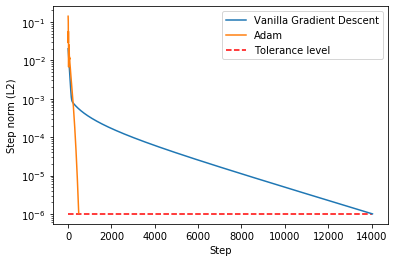

In [130]:
plt.plot(gd_diff_norms, label='Vanilla Gradient Descent')
plt.plot(adam_diff_norms, label='Adam')
plt.hlines(tol, 0, max(len(gd_diff_norms), len(adam_diff_norms)),
           color='red', linestyles='dashed', label='Tolerance level')
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Step norm (L2)')
plt.legend()

Plot the optimization trajectories for both methods

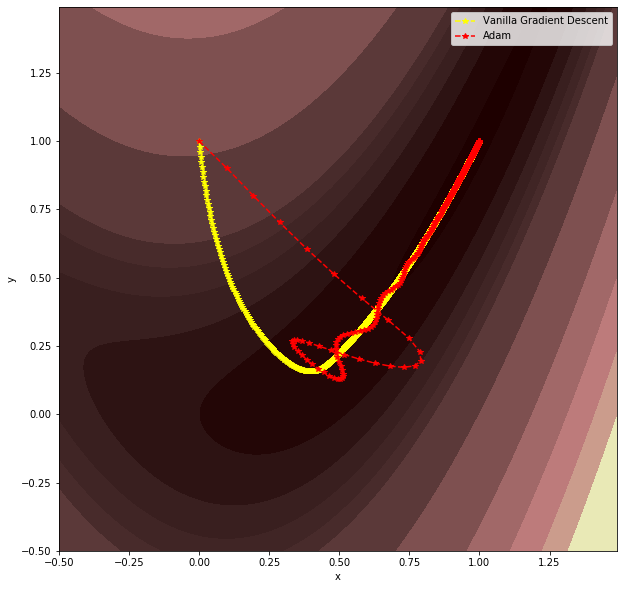

In [116]:
x = np.arange(-0.5, 1.5, 1e-2)
y = np.arange(-0.5, 1.5, 1e-2)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_banana(X, Y)

plt.figure(figsize=(10, 10))
plt.contourf(X, Y, Z, cmap='pink',
             levels=[0, 1e-3, 1e-2, 1e-1, 1, 2,
                     3, 4, 5, 10, 20, 30, 40, 50, 100])
plt.plot(gd_history[:, 0], gd_history[:, 1],
         marker='*', linestyle='dashed', 
         color='yellow', label='Vanilla Gradient Descent')
plt.plot(adam_history[:, 0], adam_history[:, 1],
         marker='*', linestyle='dashed',
         color='red', label='Adam')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()